In [1]:
import numpy as np
from src.dataset import ImageDataset

dataset = ImageDataset('database')

In [2]:
from src.vlad import vlad

model = vlad('output/cluster.joblib')

In [5]:
import h5py
import numpy as np

with h5py.File('output/vlads.h5', 'r') as f:
    db_vlad = f['vlads'][:]
    db_names = f['names'][:]

In [16]:
from src.utils import read_image, get_topk_indices
from src.dataset import ImageDataset

dataset = ImageDataset('database')
image = read_image('database/01065157_3875793450.jpg')

indices = get_topk_indices(db_vlad, model.calculate_VLAD(image), 10)
indices = indices[0]

In [17]:
for i in indices:
    print(db_names[i])

b'database/01065157_3875793450.jpg'
b'database/15389470_4226878977.jpg'
b'database/31874588_8650942754.jpg'
b'database/07127770_6944612870.jpg'
b'database/95115466_1671172809.jpg'
b'database/45655486_4053263103.jpg'
b'database/93355615_1672027412.jpg'
b'database/32909596_13855717154.jpg'
b'database/76292555_1671173605.jpg'
b'database/78374973_6677784101.jpg'


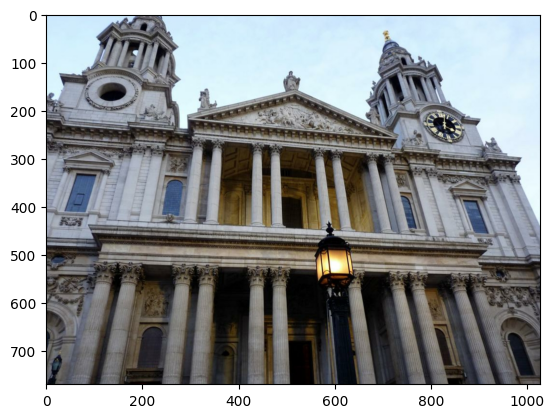

In [20]:
import matplotlib.pyplot as plt

for i in indices:
    image = read_image(db_names[i].decode('utf-8'))
    plt.imshow(image)